# Importations

In [25]:
import sys
MOD_DIR = '/home/16012858/game-learning'

if MOD_DIR not in sys.path:
    sys.path.append(MOD_DIR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn import datasets
from sklearn import svm, naive_bayes
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from mod.wine_regression import *

## Directory

In [26]:
#INPUT_DIR = "./data/fifa20_data.csv"

In [27]:
INPUT_DIR = f"{MOD_DIR}/data/fifa20_data.csv"

# Importation des données et pre-processing

In [28]:
data = pd.read_csv(INPUT_DIR)
data.head(20)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [30]:
data.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [31]:
X = data.loc[:, data.columns!="quality"]
y = data["quality"]
X.head()

KeyError: 'quality'

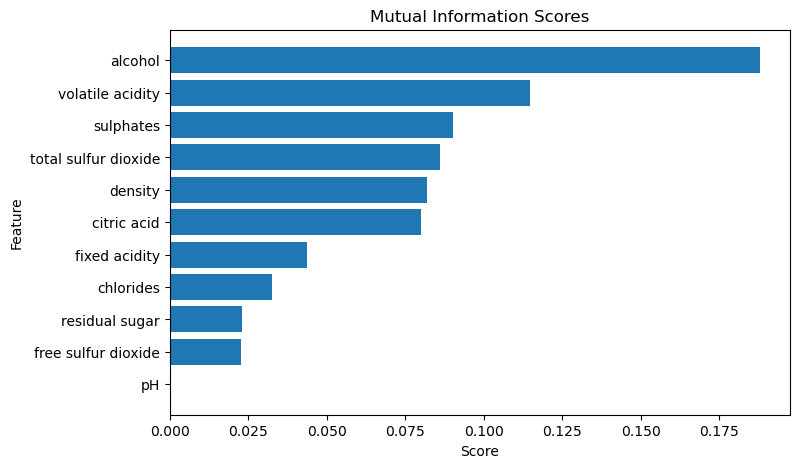

In [ ]:
mi_scores = mutual_info_scores(X, y)

plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

Nous pouvons voir sur le graphique ci-dessus que l'alcool explique majoritairement la qualité du vin.

Nous remarquons au contraire plusieurs caractéristiques (fixed_acidity, chlorides, residual sugar, free sulfur dioxide et pH) dont le score d'information mutuelle est inférieur à 0.05.Nous allons donc nous affranchir de ces informatons qui semblent moins significatives pour la prédiction.

In [ ]:
X = X.drop(["free sulfur dioxide","residual sugar","pH","volatile acidity","density","total sulfur dioxide","chlorides"], axis = 1)
X.head()

,fixed acidity,citric acid,sulphates,alcohol
0,7.4,0.00,0.56,9.4
1,7.8,0.00,0.68,9.8
2,7.8,0.04,0.65,9.8
3,11.2,0.56,0.58,9.8
4,7.4,0.00,0.56,9.4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
epochs = 20
batch_size = 10

In [ ]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm = LinearRegression()
scores = cross_val_score(mod_non_norm, X_train, y_train, cv=10)
print("Score sans normalisation des données :", scores.mean())

Score sans normalisation des données : 0.2652913918881771


In [ ]:
# Entraîner un modèle de régression linéaire avec normalisation des données
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

mod_norm = LinearRegression()
scores_norm = cross_val_score(mod_norm, X_train_norm, y_train, cv=10)
print("Score avec normalisation des données :", scores_norm.mean())


Score avec normalisation des données : 0.26529139188817696


> <span style="color:magenta"> Nous nous attendions à ce que le modèle 1 soit meilleur que le 2 car... </span>